In [234]:
import pandas as pd
from dateutil.parser import parse
import json
from numpy import nan
import matplotlib
matplotlib.style.use('ggplot')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [3]:
h = open ('samples/final_data/final_data', 'rU')
data = h.read()
data = json.loads(data)

In [6]:
# all game titles
data.keys()

[u'Surgeon Simulator 2013',
 u'The Binding of Isaac: Rebirth',
 u'Alien Rage',
 u'Unmechanical',
 u'Tiny Troopers',
 u'Endless Space',
 u'Akaneiro: Demon Hunters',
 u'Mutant Mudds',
 u'Deep Black: Reloaded',
 u'The Stanley Parable',
 u'Binary Domain',
 u'WRC 4: FIA World Rally Championship',
 u'Gettysburg: Armored Warfare',
 u'Torchlight',
 u'F1 2014',
 u'F1 2013',
 u'F1 2012',
 u'F1 2011',
 u'Sleeping Dogs',
 u'Endless Legend',
 u'Diablo III',
 u'BattleBlock Theater',
 u'Gangsters',
 u'Sniper Elite',
 u'Deathtrap',
 u"Shad'O",
 u'Disney Epic Mickey 2: The Power of Two',
 u'Grow Home',
 u'Pac-Man and the Ghostly Adventures',
 u'Dark Souls',
 u"Tom Clancy's Ghost Recon: Future Soldier",
 u'Starcraft II: Heart of the Swarm',
 u'Shadow Warrior',
 u'The Wolf Among Us',
 u'Max: The Curse of Brotherhood',
 u'Apotheon',
 u"Tom Clancy's Ghost Recon",
 u'Alien Spidy',
 u'Dark Matter (2013)',
 u'The Amazing Spider-Man',
 u'Unstoppable Gorg',
 u'The Bureau: XCOM Declassified',
 u'FTL: Faster Than

In [197]:
vendors = []
for v in data.values():
    for col in v['price_history'][0].keys():
        if col not in vendors and col not in ('certainty', 'emphasis', 'Date'):
            vendors.append(col)
# all vendor titles
vendors
            

[u'',
 u'GetGames',
 u'Humble Store',
 u'Steam',
 u'Amazon',
 u'GOG',
 u'GreenMan Gaming',
 u'GameFly',
 u'GamersGate',
 u'Desura',
 u'Gamesrocket',
 u'Nuuvem',
 u'GamesPlanet US',
 u'GameStop PC',
 u'FunStock Digital',
 u'Uplay PC',
 u'DLGamer',
 u'Gameolith',
 u'ShinyLoot',
 u'Direct2Drive',
 u'GamesRepublic',
 u'Origin PC',
 u'GamesPlanet DE',
 u'GamesPlanet UK',
 u'GamesPlanet FR',
 u'IndieGala Store',
 u'IndieGameStand',
 u'Bundle Stars',
 u'Square Enix',
 u'Newegg',
 u'Humble Widgets',
 u'Adventure Shop',
 u'FireFlower',
 u'Coinplay.io']

In [7]:
game_data = data['Far Cry 4']

In [8]:
game_data.keys()

[u'',
 u'publisher',
 u'name',
 u'date_published',
 u'theme',
 u'score',
 u'systems',
 u'user_review_score',
 u'price_history',
 u'genre',
 u'developer']

In [248]:
def clean_up_sales_data(game):
    game_data = data[game]
    pub_date = parse(game_data['date_published']).date()
    publisher = game_data['publisher']
    score = float(game_data['score'])
    user_review_score = float(game_data['user_review_score'])
    developer = game_data['developer']
    genre = game_data['genre']
    theme = game_data['theme']
    
    print 'Processing %s, %s' % (game, str(pub_date))

    df = pd.DataFrame(game_data['price_history'])
    # clean columns
    df = df[[c for c in df.columns if c not in ('certainty', 'emphasis', '')]]
    df['Date'] = df['Date'].apply(lambda d:parse(d).date())
    def clean_price(d):
        if d== '':
            return nan
        else: return float(d)
    for c in df.columns:
        if c == 'Date': 
            continue
        else:
            df[c] = df[c].apply(clean_price)
    # stack vendors
    df = df.set_index('Date').stack().reset_index()
    df.columns = ['date', 'vendor', 'price']
    # create a # weeks from release date field
    df['weeks_from_release']=df.date.apply(lambda d: (d-pub_date).days/7)
    
    # aggregation: for each week, return lowest price, across all vendors, all days
    agg = df.groupby('weeks_from_release').apply(lambda d:d.price.min())
    
    # Get original price, assuming first price
    # TODO: this may not be accurate, e.g. first price maybe a preorder sales?
    original_price = agg.values[0]
    
    agg = agg.reset_index()
    agg.columns = ['weeks_from_release', 'price']
    
    # add sales pct (maybe negative value is original_price is wrong)
    agg['pct_off'] = agg.price.apply(lambda d: (original_price-d)/original_price)
    
    agg['game'] = game
    agg['pub_date'] = pub_date
    agg['publisher'] =publisher
    agg['score'] = score
    agg['user_review_score'] = user_review_score
    agg['developer'] = developer
    agg['genre'] = genre
    agg['theme'] = theme
    
    # sort columns
    leading_fields = ['game', 'weeks_from_release', 'price', 'pct_off']
    agg = agg[leading_fields + [c for c in agg.columns if c not in leading_fields]]
    return agg


In [251]:
s = clean_up_sales_data('Far Cry 4')
s

Processing Far Cry 4, 2014-11-17


,game,weeks_from_release,price,pct_off,pub_date,publisher,score,user_review_score,developer,genre,theme
0,Far Cry 4,-27,59.990,0.000000,2014-11-17,[u'Ubisoft'],7,7.8,[u'Ubisoft Montreal'],"[u'Adventure', u'3D', u'Survival', u'Action', ...",[u'Modern']
1,Far Cry 4,-26,59.990,0.000000,2014-11-17,[u'Ubisoft'],7,7.8,[u'Ubisoft Montreal'],"[u'Adventure', u'3D', u'Survival', u'Action', ...",[u'Modern']
2,Far Cry 4,-25,59.990,0.000000,2014-11-17,[u'Ubisoft'],7,7.8,[u'Ubisoft Montreal'],"[u'Adventure', u'3D', u'Survival', u'Action', ...",[u'Modern']
3,Far Cry 4,-24,59.990,0.000000,2014-11-17,[u'Ubisoft'],7,7.8,[u'Ubisoft Montreal'],"[u'Adventure', u'3D', u'Survival', u'Action', ...",[u'Modern']
4,Far Cry 4,-23,59.990,0.000000,2014-11-17,[u'Ubisoft'],7,7.8,[u'Ubisoft Montreal'],"[u'Adventure', u'3D', u'Survival', u'Action', ...",[u'Modern']
5,Far Cry 4,-22,59.990,0.000000,2014-11-17,[u'Ubisoft'],7,7.8,[u'Ubisoft Montreal'],"[u'Adventure', u'3D', u'Survival', u'Action', ...",[u'Modern']
6,Far Cry 4,-21,59.990,0.000000,2014-11-17,[u'Ubisoft'],7,7.8,[u'Ubisoft Montreal'],"[u'Adventure', u'3D', u'Survival', u'Action', ...",[u'Modern']
7,Far Cry 4,-20,59.990,0.000000,2014-11-17,[u'Ubisoft'],7,7.8,[u'Ubisoft Montreal'],"[u'Adventure', u'3D', u'Survival', u'Action', ...",[u'Modern']
8,Far Cry 4,-19,59.990,0.000000,2014-11-17,[u'Ubisoft'],7,7.8,[u'Ubisoft Montreal'],"[u'Adventure', u'3D', u'Survival', u'Action', ...",[u'Modern']
9,Far Cry 4,-18,59.990,0.000000,2014-11-17,[u'Ubisoft'],7,7.8,[u'Ubisoft Montreal'],"[u'Adventure', u'3D', u'Survival', u'Action', ...",[u'Modern']


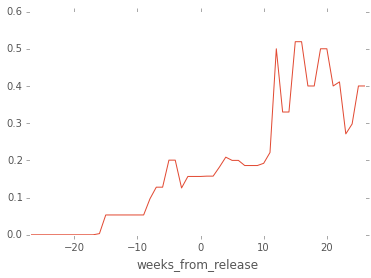

In [252]:
s.set_index('weeks_from_release').pct_off.plot()

In [245]:
# Now process all the games
pieces = []
for k,v in data.iteritems():
    print k
    pieces.append(clean_up_sales_data(k))

Surgeon Simulator 2013
The Binding of Isaac: Rebirth
Alien Rage
Unmechanical
Tiny Troopers
Endless Space
Akaneiro: Demon Hunters
Mutant Mudds
Deep Black: Reloaded
The Stanley Parable
Binary Domain
WRC 4: FIA World Rally Championship
Gettysburg: Armored Warfare
Torchlight
F1 2014
F1 2013
F1 2012
F1 2011
Sleeping Dogs
Endless Legend
Diablo III
BattleBlock Theater
Gangsters
Sniper Elite
Deathtrap
Shad'O
Disney Epic Mickey 2: The Power of Two
Grow Home
Pac-Man and the Ghostly Adventures
Dark Souls
Tom Clancy's Ghost Recon: Future Soldier
Starcraft II: Heart of the Swarm
Shadow Warrior
The Wolf Among Us
Max: The Curse of Brotherhood
Apotheon
Tom Clancy's Ghost Recon
Alien Spidy
Dark Matter (2013)
The Amazing Spider-Man
Unstoppable Gorg
The Bureau: XCOM Declassified
FTL: Faster Than Light
Total War: Rome II
SPACECOM
The Night of the Rabbit
Castlevania: Lords of Shadow 2
The Crew
Do Not Fall
Magrunner: Dark Pulse
Scarygirl
1001 Spikes
Don't Starve
Broken Sword 5: The Serpent's Curse
Grand The

In [246]:

master = pd.concat(pieces)
master.to_csv('master.csv')